In [1]:
## Free AI classes in Every city Hackathon

## Problem definition 
The objective of the challenge is to predict the price (Amount (Million Naira)
 the company should sell a car based on the available data (Location, Maker, Model, Year, Colour, Amount (Million Naira), Type, Distance). 
 The objective is the predict the selling price.

## Data
The data is downloaded from zindi free AI classes in every city hackathon
https://zindi.africa/competitions/free-ai-classes-in-every-city-hackathon

There are ~7000 entries in Train and ~2000 entries in Test.

The objective of the challenge is to predict the price
(Amount (Million Naira) the company should sell a car based on the
available data (Location, Maker, Model, Year, Colour, Amount (Million Naira), Type, Distance). 
The objective is the predict the selling price.

## Evaluation
The evaluation metric for this competition is Root Mean Squared Error.

Note: For every row in the dataset, submission files should contain 2 columns: ID and Target.


##Features

VehicleID	This is the unique identifier of the car.
Location	This is the location in Nigeria where the seller is based.
Maker	This is the manufacturer of the car. It is the brand name.
Model	This is the the name of the car product within a range of similar car products.
Year	This is the year the car was manufactured.
Colour	This is the colour of the car.
Amount (Million Naira)	This is the selling price of the car. It is the amount the company will sell the car.
Type	This is the nature of previous use of the car, whether it was previously used within Nigeria or outside Nigeria.
Distance	This is the mileage of the car. It is how much distance it covered in its previous use


In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from tqdm import tqdm


In [3]:
# Importing training data set
df_train = pd.read_csv('Train.csv')

# Importing test data set
df_test = pd.read_csv('Test.csv')

#Importng sample submission
sample_submission = pd.read_csv('SampleSubmission.csv')

In [4]:
df_train

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"
...,...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used,"65,000"
7201,VHL10637,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used,"200,000"
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used,"85,750"


In [5]:
df_train.shape, sample_submission.shape, df_test.shape

((7205, 9), (2061, 2), (2061, 8))

In [6]:
df_train = df_train[df_train['Amount (Million Naira)'].notnull()]

In [7]:
target = df_train['Amount (Million Naira)']

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7188 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7188 non-null   object 
 1   Location                7188 non-null   object 
 2   Maker                   7188 non-null   object 
 3   Model                   7188 non-null   object 
 4   Year                    7167 non-null   object 
 5   Colour                  7188 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    6992 non-null   object 
 8   Distance                4836 non-null   object 
dtypes: float64(1), object(8)
memory usage: 561.6+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VehicleID  2061 non-null   object 
 1   Location   2061 non-null   object 
 2   Maker      2061 non-null   object 
 3   Model      2061 non-null   object 
 4   Year       2059 non-null   object 
 5   Colour     2061 non-null   object 
 6   Type       2007 non-null   object 
 7   Distance   1385 non-null   float64
dtypes: float64(1), object(7)
memory usage: 128.9+ KB


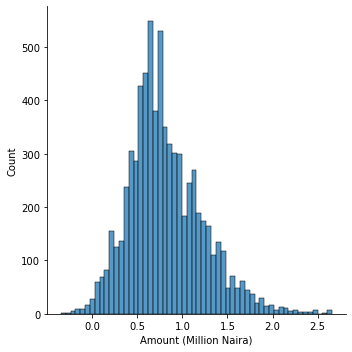

In [10]:
sns.displot(np.log10(df_train['Amount (Million Naira)']));

In [11]:
# Check missing values Train
df_train.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)       0
Type                       196
Distance                  2352
dtype: int64

In [12]:
# Check missing values Test
df_test.isnull().sum()

VehicleID      0
Location       0
Maker          0
Model          0
Year           2
Colour         0
Type          54
Distance     676
dtype: int64

In [13]:
for column in df_train.columns:
    print(column,":::::: ",df_train[column].nunique())

VehicleID ::::::  5129
Location ::::::  3
Maker ::::::  55
Model ::::::  1221
Year ::::::  33
Colour ::::::  21
Amount (Million Naira) ::::::  742
Type ::::::  3
Distance ::::::  3140


In [14]:
for column in df_test.columns:
    print(column,":::::: ",df_test[column].nunique())

VehicleID ::::::  1873
Location ::::::  3
Maker ::::::  40
Model ::::::  587
Year ::::::  29
Colour ::::::  18
Type ::::::  3
Distance ::::::  1020


In [15]:
# Seperating the train and test giving unque numbers  (1, 0 )
df_train['Train']  =1
df_test['Train']  =0

C:\Users\JOHNKE~1\AppData\Local\Temp/ipykernel_10656/2125064006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Train']  =1


In [16]:
#joining the two data together 
all_data = pd.concat([df_train.drop('Amount (Million Naira)',axis  =  1),df_test]).reset_index(drop = True)

In [17]:
all_data.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Train
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,Nigerian Used,NaN,1
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,Nigerian Used,"125,000",1
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,Foreign Used,"110,852",1
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,Foreign Used,"30,000",1
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,Nigerian Used,"125,206",1


In [18]:
# joining the catergorical columns
columns_transformer = ['Year', 'Maker', 'Model', 'Colour', 'Type','Location']
columns_transformer

['Year', 'Maker', 'Model', 'Colour', 'Type', 'Location']

In [19]:
## convert the data categorical to (1, 0)
all_data = pd.get_dummies( all_data,columns = columns_transformer)
all_data.head()

,VehicleID,Distance,Train,"Year_1,979","Year_1,982","Year_1,986","Year_1,989","Year_1,991","Year_1,992","Year_1,993",...,Colour_V,Colour_Violet,Colour_White,Colour_Yellow,Type_Brand New,Type_Foreign Used,Type_Nigerian Used,Location_Abuja,Location_Ibadan,Location_Lagos
0,VHL12546,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,VHL18827,"125,000",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,VHL19499,"110,852",1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,VHL17991,"30,000",1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,VHL12170,"125,206",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [20]:
# droping columns
all_data = all_data.drop(['VehicleID','Distance'],axis = 1)

In [21]:
all_data.head()

,Train,"Year_1,979","Year_1,982","Year_1,986","Year_1,989","Year_1,991","Year_1,992","Year_1,993","Year_1,995","Year_1,996",...,Colour_V,Colour_Violet,Colour_White,Colour_Yellow,Type_Brand New,Type_Foreign Used,Type_Nigerian Used,Location_Abuja,Location_Ibadan,Location_Lagos
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [22]:
# seperating the data back to train and test
df_train = all_data[all_data.Train == 1]
df_test = all_data[all_data.Train == 0]

In [23]:
df_train =  df_train.drop('Train',axis = 1)
df_test =  df_test.drop('Train',axis = 1)

In [24]:
df_train.head()

,"Year_1,979","Year_1,982","Year_1,986","Year_1,989","Year_1,991","Year_1,992","Year_1,993","Year_1,995","Year_1,996","Year_1,997",...,Colour_V,Colour_Violet,Colour_White,Colour_Yellow,Type_Brand New,Type_Foreign Used,Type_Nigerian Used,Location_Abuja,Location_Ibadan,Location_Lagos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


## MODELLING

In [25]:
y= target
X= df_train

In [26]:

np.random.seed(14)


X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [27]:
print(X_train.shape, y_train.shape)

(5750, 1531) (5750,)


In [28]:
print(X_test.shape, y_test.shape)

(1438, 1531) (1438,)


In [29]:
X.head()

,"Year_1,979","Year_1,982","Year_1,986","Year_1,989","Year_1,991","Year_1,992","Year_1,993","Year_1,995","Year_1,996","Year_1,997",...,Colour_V,Colour_Violet,Colour_White,Colour_Yellow,Type_Brand New,Type_Foreign Used,Type_Nigerian Used,Location_Abuja,Location_Ibadan,Location_Lagos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [30]:
y.head()

0     2.2
1     3.5
2     9.2
3    22.8
4     2.6
Name: Amount (Million Naira), dtype: float64

## using random forest

In [31]:
np.random.seed(14)
rs= RandomForestRegressor()

In [32]:
rs.fit(X_train,y_train,)

RandomForestRegressor()

In [33]:
rs_preds= rs.predict(X_test)
np.random.seed(14)

#sqaured=false bit tells this function to return the root means sqaured error
mean_squared_error(y_test, rs_preds, squared=False)

11.861844507816018

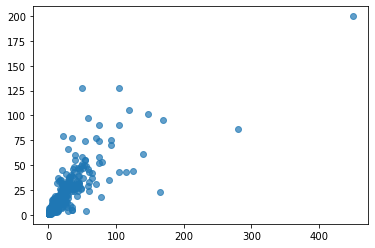

In [34]:
plt.scatter(y_test, rs.predict(X_test), alpha=0.7)

In [35]:
rs.fit(X, y)

RandomForestRegressor()

In [36]:
sample_submission["Amount (Million Naira)"] = rs.predict(df_test)
sample_submission

,VehicleID,Amount (Million Naira)
0,VHL18518,3.971500
1,VHL17149,5.867240
2,VHL10927,4.395733
3,VHL12909,4.192013
4,VHL12348,9.036379
...,...,...
2056,VHL17903,22.443333
2057,VHL14018,4.781700
2058,VHL17473,6.599767
2059,VHL11480,10.332533


In [37]:
sample_submission.to_csv("random_forest.csv", index=False)

# using gradient boost

In [38]:
np.random.seed(42)
gb = GradientBoostingRegressor() 

In [39]:
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [40]:
gb_preds= gb.predict(X_test)

#sqaured=false bit tells this function to return the root means sqaured error
mean_squared_error(y_test, gb_preds, squared=False)

12.701481175425403

In [41]:
gb.fit(X, y)

GradientBoostingRegressor()

In [42]:
gb.fit(X, y)
sample_submission["Amount (Million Naira)"] = gb.predict(df_test)
sample_submission

,VehicleID,Amount (Million Naira)
0,VHL18518,6.892746
1,VHL17149,6.867898
2,VHL10927,7.224357
3,VHL12909,6.867898
4,VHL12348,7.224357
...,...,...
2056,VHL17903,22.871873
2057,VHL14018,7.224357
2058,VHL17473,8.127659
2059,VHL11480,7.224357


In [43]:
sample_submission.to_csv("random_gradient.csv", index=False)

In [44]:
#from xgboost import XGBRFRegressor,XGBRegressor
from xgboost import XGBRegressor, XGBRFRegressor

In [131]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,BaggingRegressor,VotingRegressor,StackingRegressor

In [132]:
r1 = XGBRegressor(random_state = 42)
r2 = RandomForestRegressor(random_state=42)
r3 = CatBoostRegressor(verbose=False,random_state = 42)
r4 =  GradientBoostingRegressor(random_state=42) 

# a = LinearRegression()
# b = BaggingRegressor()
# c = XGBRegressor()

# ensemble=( a*0.6 )+ ( 0.4*b )+ (0.3*c)
# v_model = VotingRegressor(ensemble)


# v_model = VotingRegressor(
#     estimators = [('XGB', XGBRegressor(random_state=42)),
#                   ('RF', RandomForestRegressor()),
#                   #('gnb', CatBoostRegressor()),
#                  #('Lr', LinearRegression()),
#                  ('Gb', GradientBoostingRegressor())],
#                  weights=(1,1,1))



In [133]:
v_model = VotingRegressor([('r1', r1),('rf', r2),('r3',r3),('r4', r4)],weights=(1,1,1,1))


In [134]:
v_model.fit(X,y)

VotingRegressor(estimators=[('r1',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          min_child_weight=None, missing=nan,
                  

In [135]:
v_model.fit(X_train,y_train )

VotingRegressor(estimators=[('r1',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          min_child_weight=None, missing=nan,
                  

In [136]:
v_preds = v_model.predict(X_test)

In [137]:
#sqaured=false bit tells this function to return the root means sqaured error
mean_squared_error(y_test, v_preds, squared=False)

11.579071309900764

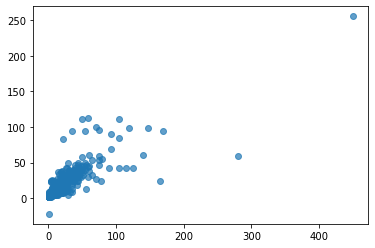

In [138]:
plt.scatter(y_test, v_model.predict(X_test), alpha=0.7)

In [139]:
sample_submission["Amount (Million Naira)"] = v_model.predict(df_test)
sample_submission

,VehicleID,Amount (Million Naira)
0,VHL18518,6.145533
1,VHL17149,6.297038
2,VHL10927,5.393659
3,VHL12909,5.117836
4,VHL12348,8.663902
...,...,...
2056,VHL17903,23.398996
2057,VHL14018,5.819280
2058,VHL17473,7.803482
2059,VHL11480,9.149034


In [140]:
sample_submission.to_csv("votingGrad.csv", index=False)